# The Sparks Foundation 

Data Science and Business Analytics Internship(Task-5)

Exploratory Data Analysis - Sports

As Sports Analyst

Find out the most successful teams, players and factors contributing win or loss of a team
Suggest teams or players a company should endorse for its products
Dataset : https://bit.ly/34SRn3b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [5]:
print(matches.shape)
print(deliveries.shape)

(756, 18)
(179078, 21)


In [6]:
print(matches.info())
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
print(matches.describe())

                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [10]:
print(deliveries.describe().T)

                  count         mean          std  min    25%    50%    75%  \
match_id       179078.0  1802.252957  3472.322805  1.0  190.0  379.0  567.0   
inning         179078.0     1.482952     0.502074  1.0    1.0    1.0    2.0   
over           179078.0    10.162488     5.677684  1.0    5.0   10.0   15.0   
ball           179078.0     3.615587     1.806966  1.0    2.0    4.0    5.0   
is_super_over  179078.0     0.000452     0.021263  0.0    0.0    0.0    0.0   
wide_runs      179078.0     0.036721     0.251161  0.0    0.0    0.0    0.0   
bye_runs       179078.0     0.004936     0.116480  0.0    0.0    0.0    0.0   
legbye_runs    179078.0     0.021136     0.194908  0.0    0.0    0.0    0.0   
noball_runs    179078.0     0.004183     0.070492  0.0    0.0    0.0    0.0   
penalty_runs   179078.0     0.000056     0.016709  0.0    0.0    0.0    0.0   
batsman_runs   179078.0     1.246864     1.608270  0.0    0.0    1.0    1.0   
extra_runs     179078.0     0.067032     0.342553  0

In [13]:
#Checking for duplicate rows
print(matches.duplicated().sum())
print(deliveries.duplicated().sum())

0
23


In [14]:
#Dropping duplicate rows
deliveries = deliveries.drop_duplicates()
print(matches.duplicated().sum())
print(deliveries.duplicated().sum())

0
0


In [15]:
#Total matches
print('Total matches in the dataset are:',matches.shape[0])

Total matches in the dataset are: 756


In [16]:
#Matches played in each season
season_matches = matches['season'].value_counts()
season_matches

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [17]:
season_matches.keys()

Index([2013, 2012, 2011, 2010, 2014, 2016, 2018, 2019, 2017, 2015, 2008, 2009], dtype='int64', name='season')

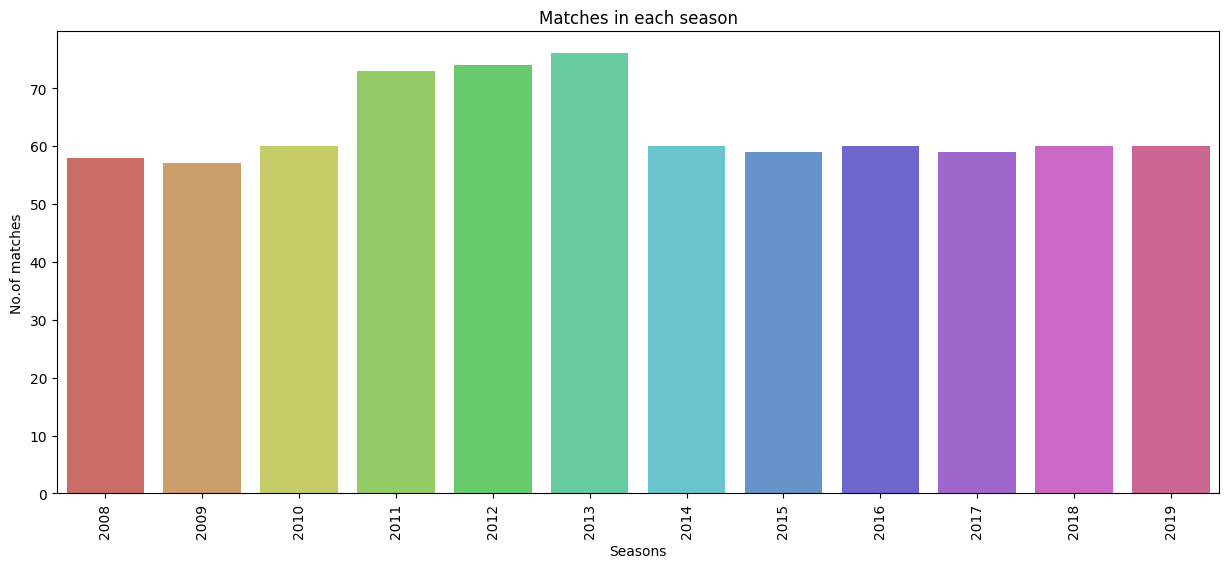

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(y = season_matches.values, x = season_matches.keys(), palette = 'hls')
plt.title('Matches in each season')
plt.xlabel('Seasons')
plt.ylabel('No.of matches')
plt.xticks(rotation = 90)
plt.show()

In [19]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [20]:
fig1 = px.bar(y = season_matches.values, x = season_matches.keys())
fig1.show()

2013 is the the year with most IPL matches(76) and 2009 is the year with least IPL matches(57)

In [21]:
matches['team1'].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [22]:
matches['team2'].value_counts()

team2
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: count, dtype: int64

# Matches played by teams since the begining of the ipl

In [23]:
matches_played_each_team = (matches['team1'].value_counts()) + (matches['team2'].value_counts())
matches_played_each_team = matches_played_each_team.sort_values(ascending=False)
matches_played_each_team

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

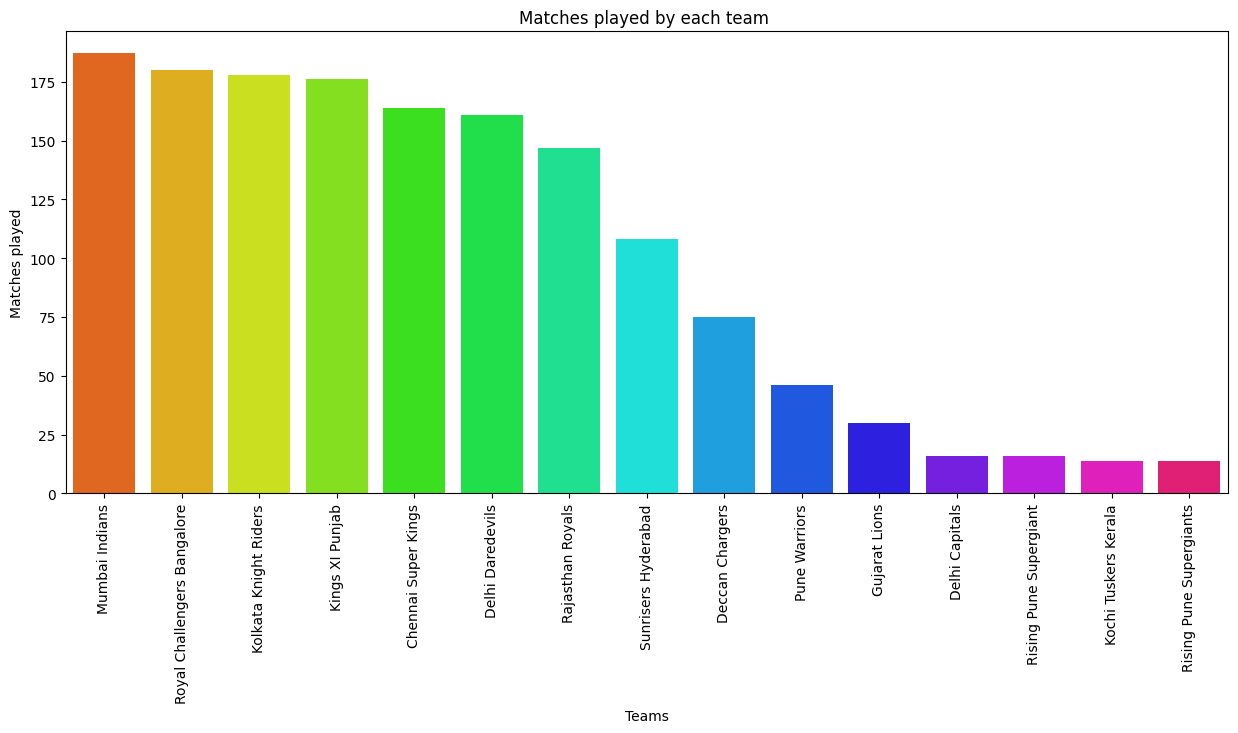

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(y = matches_played_each_team.values, x = matches_played_each_team.keys(), palette = 'hsv')
plt.title('Matches played by each team ')
plt.xlabel('Teams')
plt.ylabel('Matches played')
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians palyed the most number of matches folllowed by RCB since the inaguration of the IPL

In [25]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Team with most toss wins

In [26]:
most_toss_won = matches['toss_winner'].value_counts()
most_toss_won

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

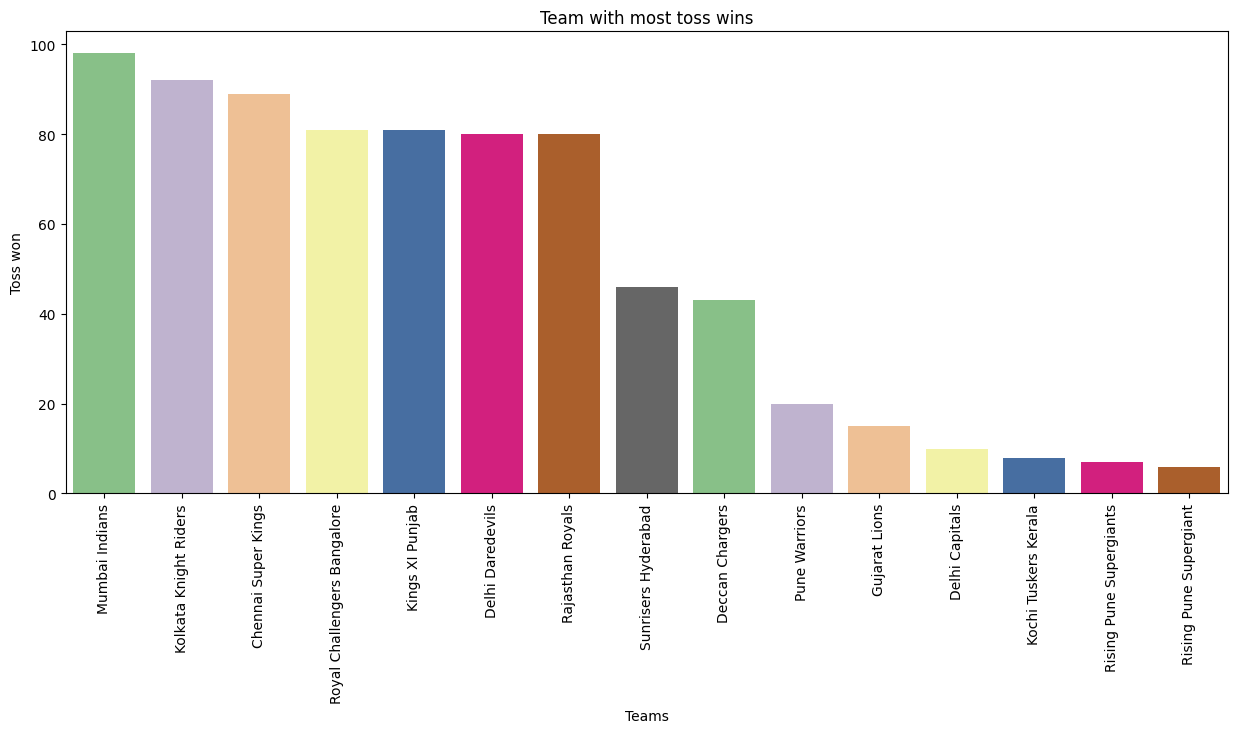

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(y = most_toss_won.values, x = most_toss_won.keys(), palette = 'Accent')
plt.title('Team with most toss wins')
plt.xlabel('Teams')
plt.ylabel('Toss won')
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians has won the the toss most number of times

In [28]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Toss_decisions

In [29]:
matches['toss_decision'].value_counts()

toss_decision
field    463
bat      293
Name: count, dtype: int64

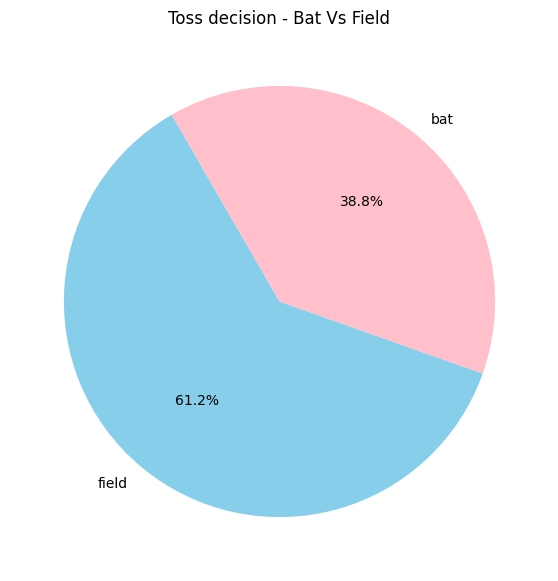

In [30]:
y = np.array(matches['toss_decision'].value_counts())
mylabels = matches['toss_decision'].value_counts().keys()
color = ["skyblue", "pink"]
plt.figure(figsize=(7,7))
plt.pie(y, labels = mylabels, colors = color,autopct='%0.1f%%',startangle=120)
plt.title('Toss decision - Bat Vs Field')
plt.show()


# Teams prefered to field first than bat upon winnig the toss

In [31]:
most_won = matches['winner'].value_counts()
most_won

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

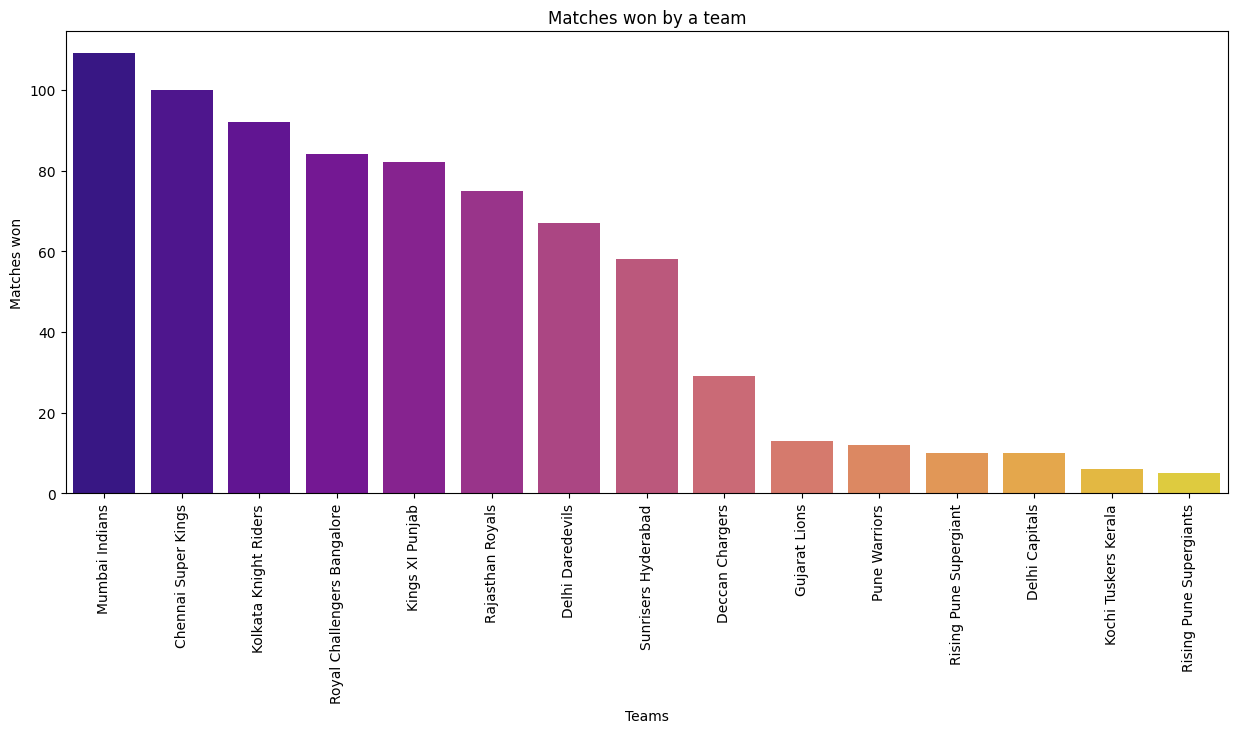

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(y = most_won.values, x = most_won.keys(), palette = 'plasma')
plt.title('Matches won by a team')
plt.xlabel('Teams')
plt.ylabel('Matches won')
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians has won the most number of matches in the league

# Season Winner

In [33]:
season_winner = matches[['season','winner']]
season_won = {}
for team in sorted(season_winner.season.unique()):
    season_won[team] = season_winner[season_winner.season == team]['winner'].tail(1).values[0]
season_won

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians'}

In [34]:
season_winner = pd.Series(season_won)
season_winner = pd.DataFrame(season_winner, columns=['team'])
season_winner

team
2008       Rajasthan Royals
2009        Deccan Chargers
2010    Chennai Super Kings
2011    Chennai Super Kings
2012  Kolkata Knight Riders
2013         Mumbai Indians
2014  Kolkata Knight Riders
2015         Mumbai Indians
2016    Sunrisers Hyderabad
2017         Mumbai Indians
2018    Chennai Super Kings
2019         Mumbai Indians

Team to win most seasons

In [35]:
most_seasons_won = season_winner.value_counts()
most_seasons_won

team                 
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: count, dtype: int64

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5')])

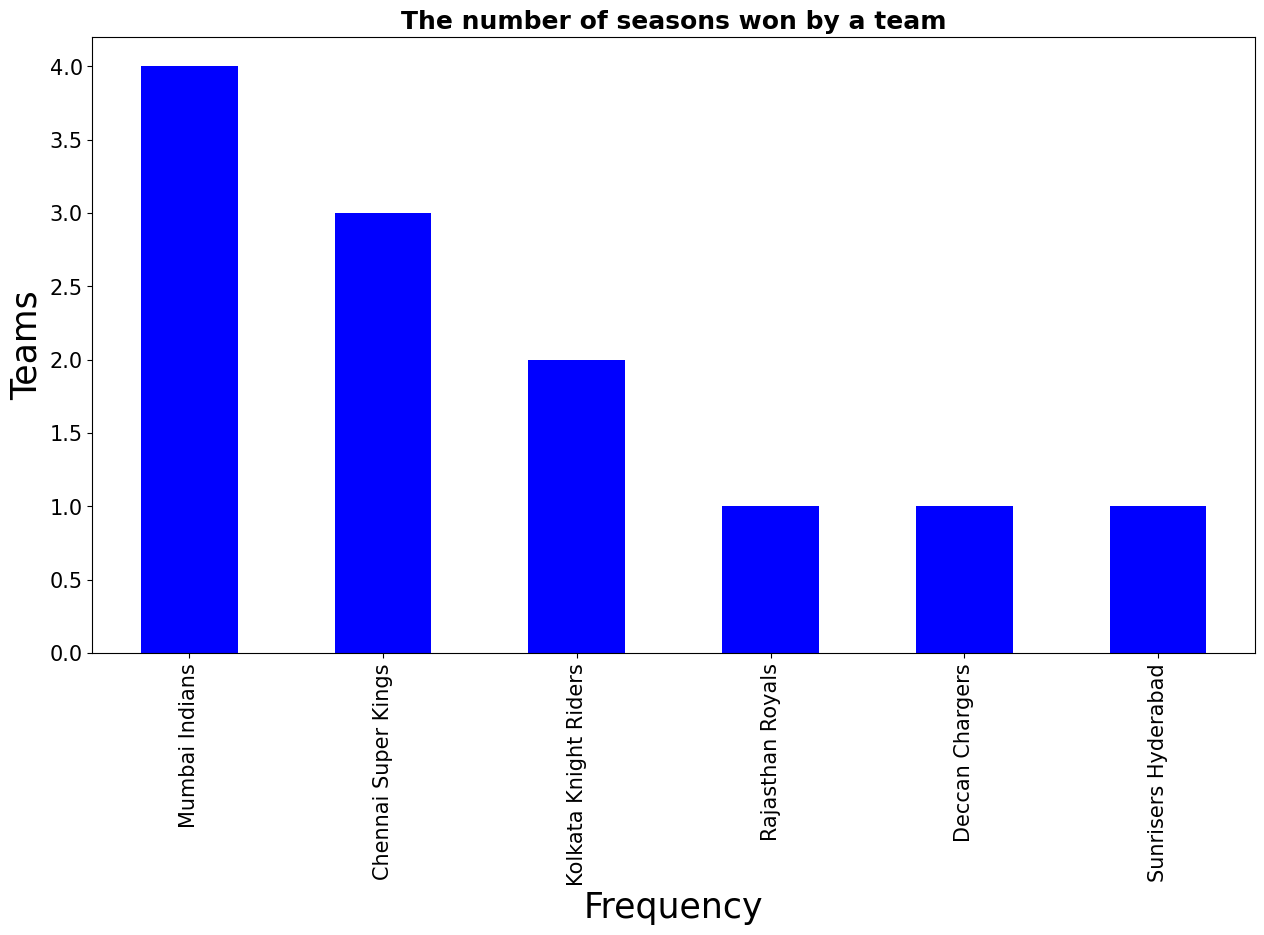

In [36]:
season_winner['team'].value_counts().plot(kind = 'bar', figsize = (15,8), color = 'b')
plt.title("The number of seasons won by a team",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

Mumbai Indians is the team to win most number of seasons(4 Seasons) followed by Chennai Super Kings(3 seasons)

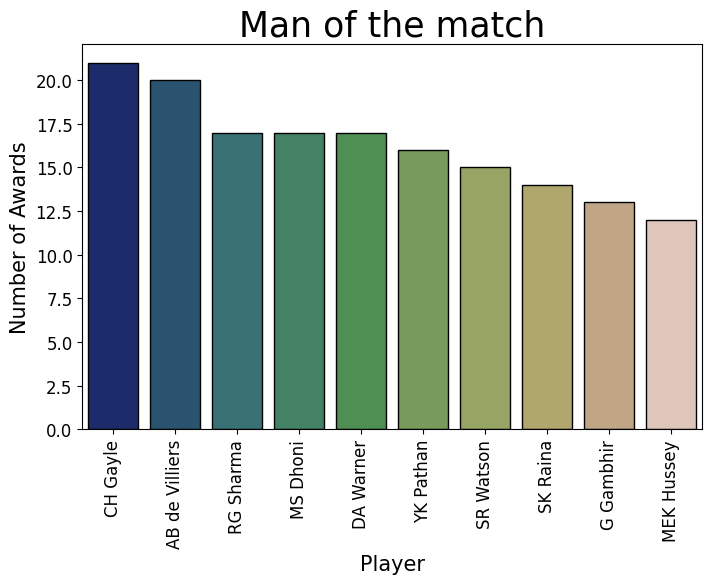

In [37]:
most_mom = matches['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(8,5))
sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='gist_earth', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Man of the match', size=25)
plt.ylabel('Number of Awards', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

Chris Gayle is the recipient of most man of the match awards followed by ABd

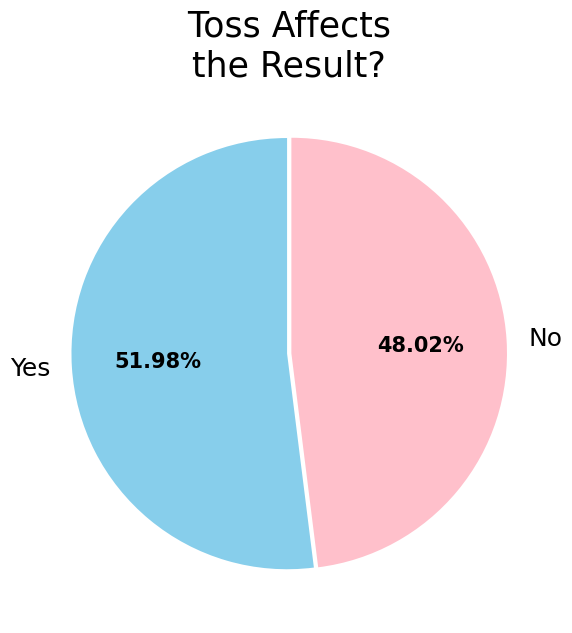

In [38]:
toss = matches.loc[matches['toss_winner'] == matches['winner']]
data = [len(toss), len(matches)-len(toss)]
fig, ax = plt.subplots(figsize=(12, 7))
colors = ["skyblue", "pink"]
wedges, texts, autotexts = ax.pie(data, labels=['Yes', 'No'], startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',colors = color)
plt.title(' Toss Affects \nthe Result?',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

# When considering the overall data there is no much affect to the game by the toss

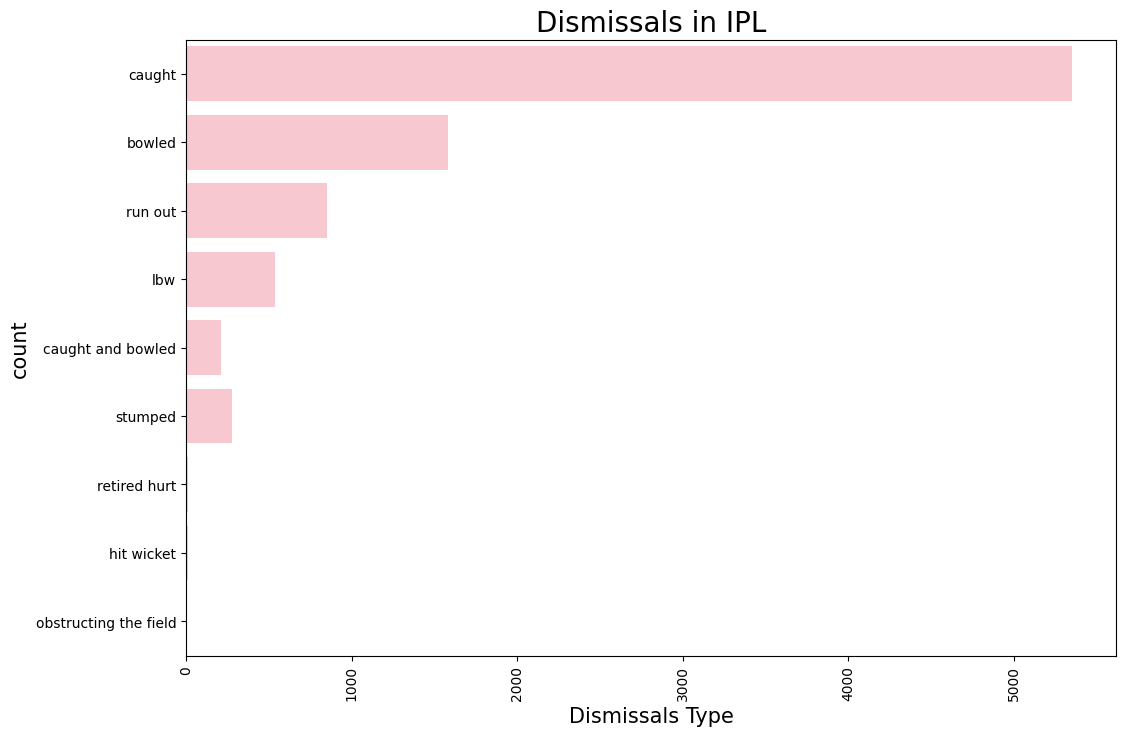

In [39]:
plt.figure(figsize=(12,8))
ax=sns.countplot(deliveries.dismissal_kind,color='pink')
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Type",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Prefered decision after winning the toss

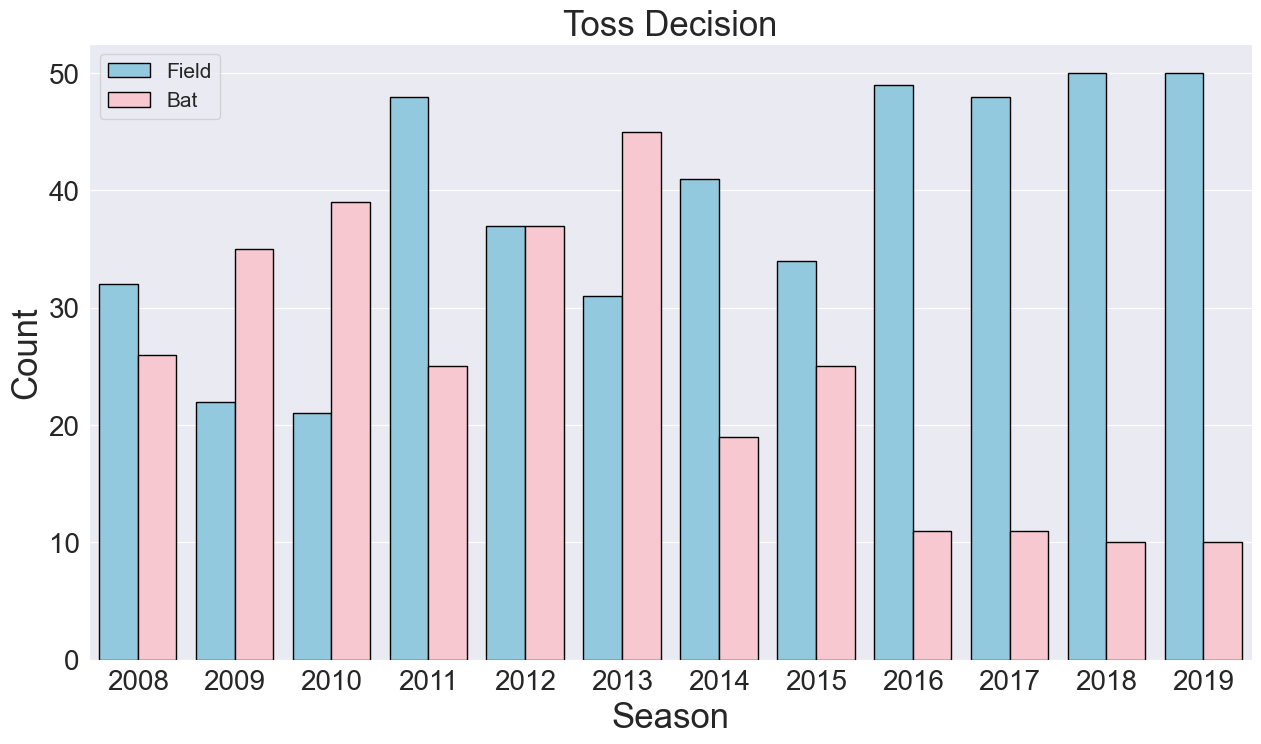

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x=matches['season'],hue=matches['toss_decision'] 
              ,palette=dict(field='skyblue',bat='pink'), edgecolor='black')
plt.title('Toss Decision', size=25)
plt.ylabel('Count', size=25)
plt.xlabel('Season', size=25)
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(('Field', 'Bat'), prop={"size" :15})
plt.show()

In the last four years we can observe that, teams prefer to field after winning toss, teams feel more comfortable chasing than deffending

# Most Wickets

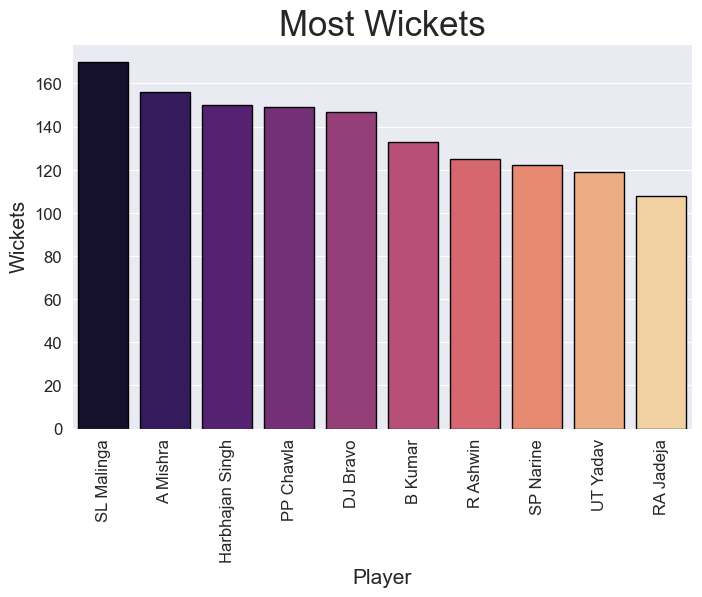

In [41]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal)]
best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='magma', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most Wickets', size=25)
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

Lasith Malinga took the most number of wickets in the league followed by Amit misra


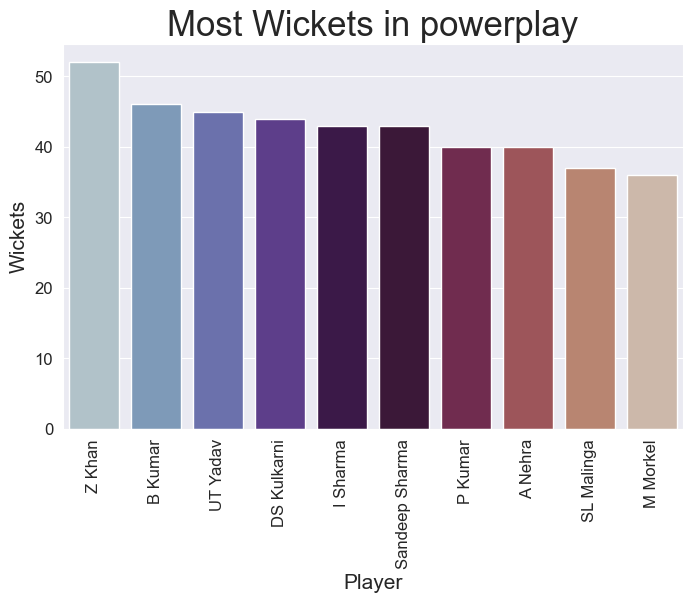

In [42]:
powerplay = [1,2,3,4,5,6]
best_bowler_pp = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(powerplay)]
best_bowler_pp = best_bowler_pp['bowler'].value_counts().reset_index().head(10)
best_bowler_pp.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(x=best_bowler_pp['bowler'], y=best_bowler_pp['wickets'],palette='twilight')
plt.xticks(rotation='vertical')
plt.title('Most Wickets in powerplay', size=25)
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

# Best death bowler


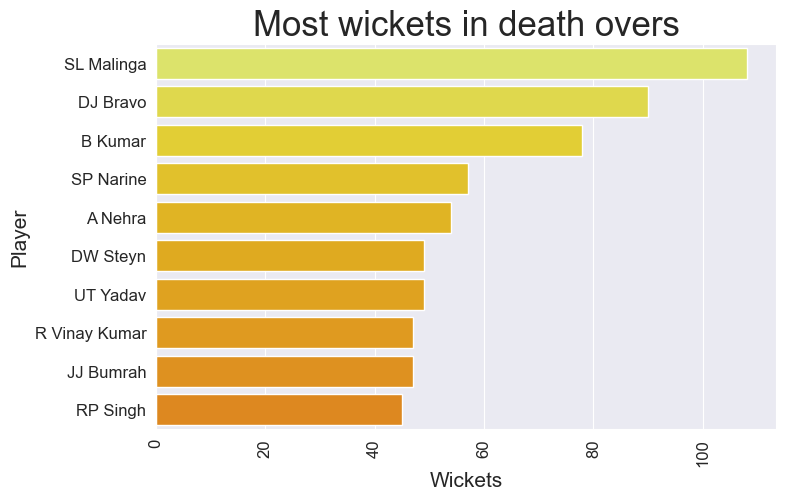

In [43]:
death = [16,17,18,19,20]
best_bowler_death = deliveries.loc[deliveries['dismissal_kind'].isin(dismissal) & deliveries['over'].isin(death)]
best_bowler_death = best_bowler_death['bowler'].value_counts().reset_index().head(10)
best_bowler_death.columns = ['bowler', 'wickets']

plt.figure(figsize=(8,5))
sns.barplot(y=best_bowler_death['bowler'], x=best_bowler_death['wickets'],palette='Wistia')
plt.xticks(rotation='vertical')
plt.title('Most wickets in death overs', size=25)
plt.ylabel('Player', size=15)
plt.xlabel('Wickets', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

Malinga is way ahead than others when it comes taking wickets in death

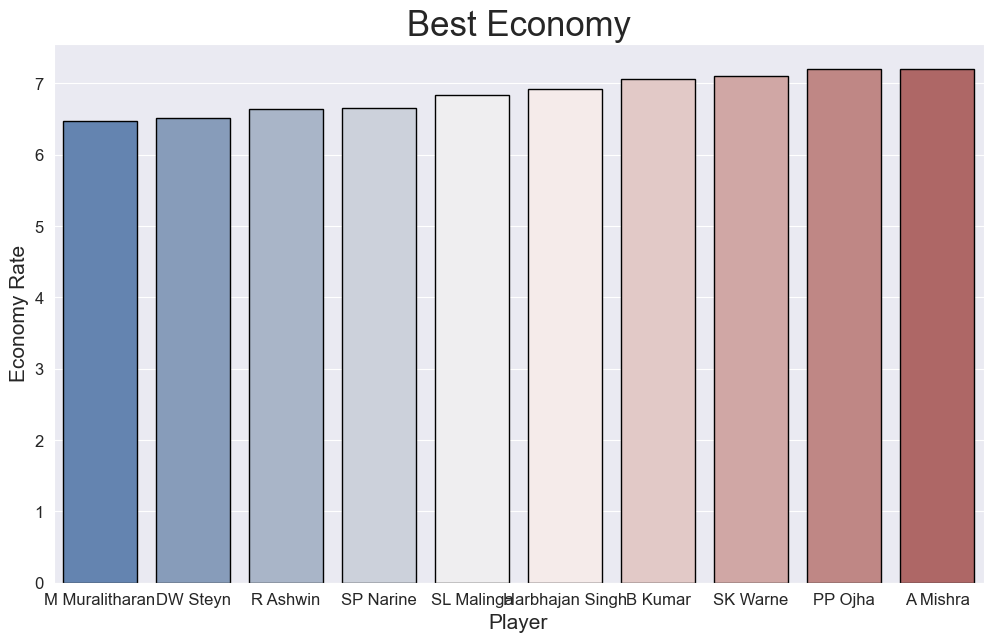

In [44]:
economy_rate=deliveries.groupby(['bowler']).sum()
economy_rate['over'] = deliveries['bowler'].value_counts()/6
economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] + economy_rate['batsman_runs']
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(12,7))
sns.barplot(y=economy_rate['rate'], x=economy_rate.index, palette='vlag',edgecolor='black')
plt.title('Best Economy', size=25)
plt.xlabel('Player', size=15)
plt.ylabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

Muralidharan, Steyn has the best economy

In [45]:
best_batsman = deliveries.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)
best_batsman

batsman_runs
batsman                     
V Kohli                 5434
SK Raina                5415
RG Sharma               4914
DA Warner               4741
S Dhawan                4631
CH Gayle                4560
MS Dhoni                4477
RV Uthappa              4444
AB de Villiers          4428
G Gambhir               4223

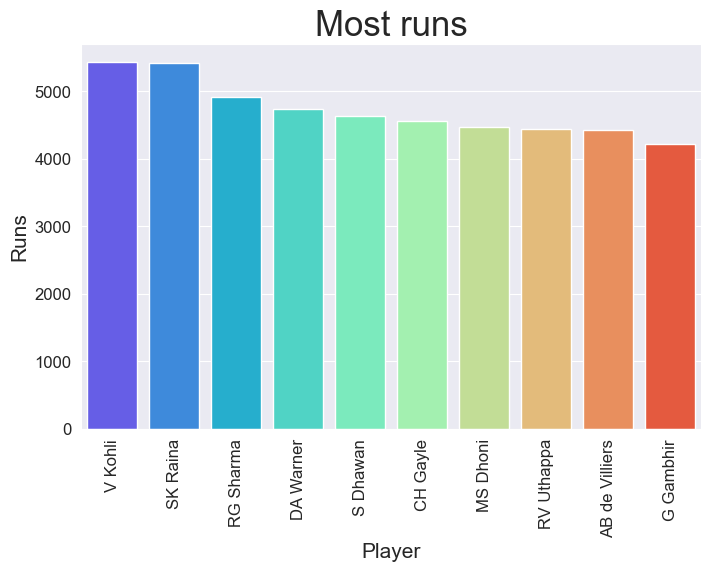

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman.index, y=best_batsman['batsman_runs'], palette='rainbow')
plt.xticks(rotation='vertical')
plt.title('Most runs', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [47]:
#Most runs in death overs
best_batsman_death = deliveries.loc[deliveries['over'].isin(death)]
best_batsman_death = best_batsman_death.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman_death = best_batsman_death.set_index('batsman').sort_values(by=['batsman_runs'], ascending=False).head(10)
best_batsman_death


batsman_runs
batsman                     
MS Dhoni                2669
KA Pollard              1562
RG Sharma               1450
AB de Villiers          1412
V Kohli                 1154
YK Pathan               1134
KD Karthik              1073
RA Jadeja                940
Yuvraj Singh             911
AT Rayudu                887

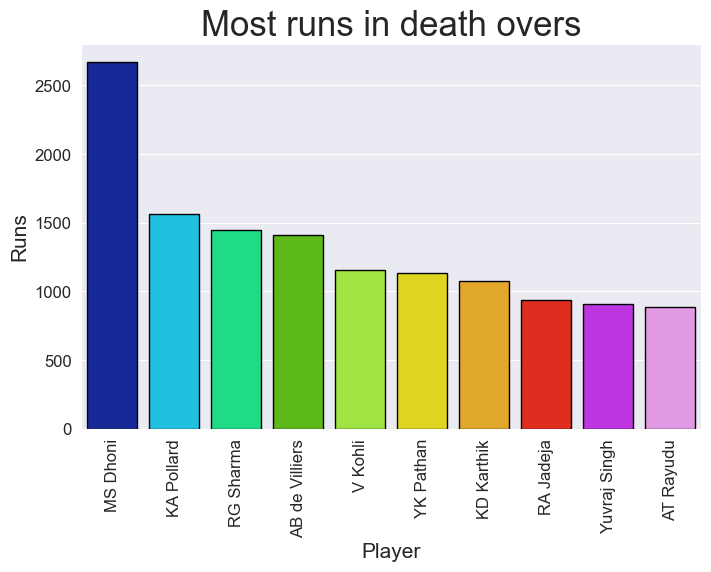

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x=best_batsman_death.index, y=best_batsman_death['batsman_runs'], palette='gist_ncar', edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most runs in death overs', size=25)
plt.ylabel('Runs', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

MS Dhoni is the best batsman to play in death overs, he is miles away from his competitors

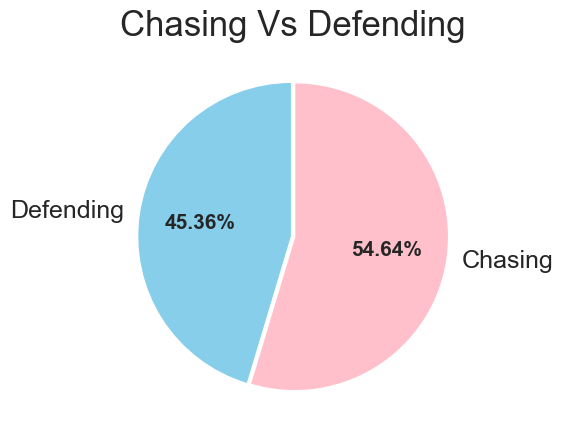

In [49]:
bat_first = matches.loc[matches['win_by_runs'] != 0]
bat_second = matches.loc[matches['win_by_wickets'] != 0]

data = [len(bat_first), len(bat_second)]
ilabels=['Defending', 'Chasing']
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(data, labels= ilabels, startangle=90,explode=(.01,.01) ,autopct='%1.2f%%',
                                  colors=['skyblue','pink'])
plt.title('Chasing Vs Defending',size=25)
plt.setp(texts, size=18)
plt.setp(autotexts, size=15, weight="bold")
plt.show()

There isn't much difference, but the chasing teams have a slight edge over defending teams

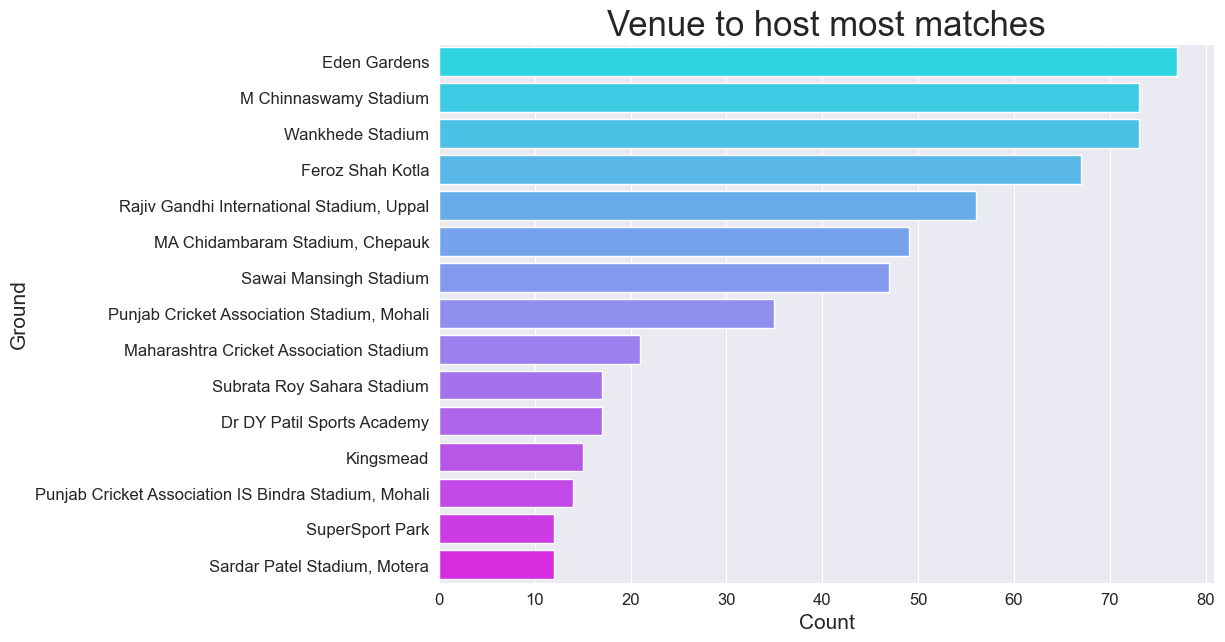

In [50]:
venue = matches['venue'].value_counts().reset_index().head(15)
venue.columns = ['ground', 'Matches']

plt.figure(figsize=(10,7))
sns.barplot(x=venue['Matches'],y=venue['ground'],palette='cool')
plt.title('Venue to host most matches', size=25)
plt.ylabel('Ground', size=15)
plt.xlabel('Count', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [51]:
#Finale matches analysis
finale=matches.drop_duplicates(subset=['season'], keep='last')
finale[['season','winner']].reset_index(drop=True).sort_values('season')

season                 winner
1     2008       Rajasthan Royals
2     2009        Deccan Chargers
3     2010    Chennai Super Kings
4     2011    Chennai Super Kings
5     2012  Kolkata Knight Riders
6     2013         Mumbai Indians
7     2014  Kolkata Knight Riders
8     2015         Mumbai Indians
9     2016    Sunrisers Hyderabad
0     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians

In [52]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
Toss=matches.toss_decision.value_counts()

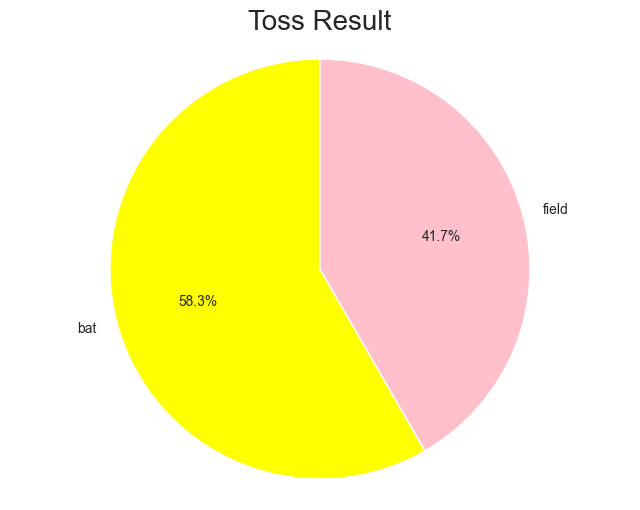

In [53]:
Toss=finale.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['yellow','pink']
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

In [54]:
finale[['toss_winner','toss_decision','winner']].reset_index(drop=True)

toss_winner toss_decision                 winner
0                Mumbai Indians           bat         Mumbai Indians
1              Rajasthan Royals         field       Rajasthan Royals
2   Royal Challengers Bangalore         field        Deccan Chargers
3           Chennai Super Kings           bat    Chennai Super Kings
4           Chennai Super Kings           bat    Chennai Super Kings
5           Chennai Super Kings           bat  Kolkata Knight Riders
6                Mumbai Indians           bat         Mumbai Indians
7         Kolkata Knight Riders         field  Kolkata Knight Riders
8           Chennai Super Kings         field         Mumbai Indians
9           Sunrisers Hyderabad           bat    Sunrisers Hyderabad
10          Chennai Super Kings         field    Chennai Super Kings
11               Mumbai Indians           bat         Mumbai Indians

In [55]:
finale[['season','winner','player_of_match','win_by_runs','win_by_wickets']].reset_index(drop=True)

season                 winner player_of_match  win_by_runs  win_by_wickets
0     2017         Mumbai Indians       KH Pandya            1               0
1     2008       Rajasthan Royals       YK Pathan            0               3
2     2009        Deccan Chargers        A Kumble            6               0
3     2010    Chennai Super Kings        SK Raina           22               0
4     2011    Chennai Super Kings         M Vijay           58               0
5     2012  Kolkata Knight Riders        MS Bisla            0               5
6     2013         Mumbai Indians      KA Pollard           23               0
7     2014  Kolkata Knight Riders       MK Pandey            0               3
8     2015         Mumbai Indians       RG Sharma           41               0
9     2016    Sunrisers Hyderabad     BCJ Cutting            8               0
10    2018    Chennai Super Kings       SR Watson            0               8
11    2019         Mumbai Indians       JJ Bumrah            1               0

In [56]:
print("The Number of times a team won a toss and went on to win the match in finals: ",len(finale[finale['toss_winner']==finale['winner']]['winner']))

The Number of times a team won a toss and went on to win the match in finals:  9


In [57]:
finale['player_of_match'].value_counts()

player_of_match
KH Pandya      1
YK Pathan      1
A Kumble       1
SK Raina       1
M Vijay        1
MS Bisla       1
KA Pollard     1
MK Pandey      1
RG Sharma      1
BCJ Cutting    1
SR Watson      1
JJ Bumrah      1
Name: count, dtype: int64

# Conclusion

A total of 756 matches have been held so far in the league.

2013 is the season with most number of matches and 2009 is the season with least number of matches.

Mumbai Indians played the most matches in IPL followed by Royal Challengers Bangalore.

The most times a team winning the toss in IPL is Mumbai Indians.

62.1% teams which won the toss, chose to field first.

Mumbai Indians is the team with most wins in the league followed by Chennai SuperKings.

Mumbai Indians is the most successful team in IPL with 4 trophies, follwed by CSK(3), KKR(2), Hyderabad franchise(2(1 as Deccan Chargers and 1 as SRH)), Rajasthan Royals(1).

Chris Gayle is the recipient of most man of the match awards followed by Ab de Villiers.

Lasith Malinga is the highest wicket taker in the league, followed by Amit Mishra.

Zaheer Khan is the best bowler in powerplay, whereas Malinga has been crucial in the death overs (as per wickets taken).

M Muralitharan and Steyn are the most economical bowlers in the league.

Virat Kohli is the most run getter in the league followed by Suresh Raina with a very small margin.

MS Dhoni is the best batsman in death overs by the number of runs he scored in death overs.

51.8% Teams winning the toss have won the game, 48.02% have lost the game. There is no much difference, so toss is not the key deciding factor.

Majorly in the last four seasons(2016,2017,2018,2019) teams won the toss felt comfortable to chase.

54.64% Chasing teams have won the match

In the season finals, the win percent is 66.7% for a defending team.

In finals, 9 out of 12 times, a team won the toss went on to win the match.

In finals, teams decision to bat first after winng toss is 58.3%.